In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
print('all required library done')

all required library done


In [2]:
train = pd.read_excel('adult dataset_income.xlsx',engine='openpyxl')
test = pd.read_excel('test_adult dataset.xlsx',engine='openpyxl')

In [3]:
train.shape

(32561, 15)

In [4]:
test.shape

(16281, 15)

In [5]:
for column in test.columns : 
    print('----------------------------',column,'-------------------------------')
    print(test[column].unique())


---------------------------- age -------------------------------
[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87]
---------------------------- workclass -------------------------------
[' Private' ' Local-gov' ' ?' ' Self-emp-not-inc' ' Federal-gov'
 ' State-gov' ' Self-emp-inc' ' Without-pay' ' Never-worked']
---------------------------- fnlwgt -------------------------------
[226802  89814 336951 ... 349230 321403  83891]
---------------------------- education -------------------------------
[' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' Doctorate' ' 5th-6th' ' Assoc-voc'
 ' 9th' ' 12th' ' 1st-4th' ' Preschool']
---------------------------- education-num -------------------------------
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
--------------

In [6]:
for column in test.columns : 
    if test[column].dtypes == 'object' : 
        test[column] = test[column].apply(lambda x : x.strip())
    

In [7]:
test['class(target'] = test['class(target'].str.replace('.','')

In [8]:
test['class(target']

0        <=50K
1        <=50K
2         >50K
3         >50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: class(target, Length: 16281, dtype: object

In [9]:
joined_df = pd.concat([train,test])

In [10]:

for column in joined_df.columns : 
    print('----------------------------',column,'-------------------------------')
    print(joined_df[column].unique())


---------------------------- age -------------------------------
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]
---------------------------- workclass -------------------------------
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
---------------------------- fnlwgt -------------------------------
[ 77516  83311 215646 ... 173449  89686 350977]
---------------------------- education -------------------------------
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
---------------------------- education-num -------------------------------
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
---------------------------- marital

In [11]:
#replacing ? sign with 
joined_df.replace('?',np.nan,inplace=True)

In [12]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  class(target    48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [13]:
joined_df.isnull().sum()

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class(target         0
dtype: int64

In [14]:
#filling missing value :
#filling missing value for categorical variables
joined_df['workclass'].fillna(joined_df['workclass'].mode()[0],inplace=True)
joined_df['occupation'].fillna(joined_df['occupation'].mode()[0],inplace=True)
joined_df['native-country'].fillna(joined_df['native-country'].mode()[0],inplace=True)

In [15]:
joined_df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class(target      0
dtype: int64

In [16]:
non_categorical_columns = joined_df.select_dtypes(exclude='object').columns

In [17]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738483
hours-per-week 0.23874965720275756


<AxesSubplot:xlabel='capital-loss'>

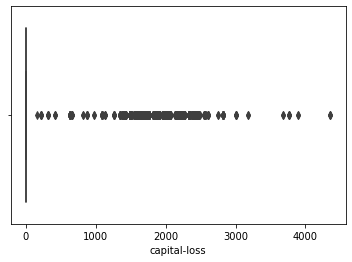

In [18]:
#scaling feature for capital gain and capital loss
sns.boxplot(x='capital-loss',data=joined_df)

<AxesSubplot:xlabel='capital-gain'>

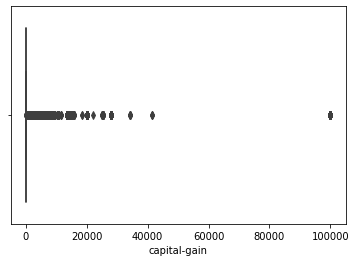

In [19]:
sns.boxplot(x='capital-gain',data=joined_df)

In [20]:
#transform data 
#joined_df['capital-loss'] = np.log1p(joined_df['capital-loss'])
#joined_df['capital-gain'] = np.log1p(joined_df['capital-gain'])

In [21]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738483
hours-per-week 0.23874965720275756


In [22]:
from sklearn.preprocessing import RobustScaler,PowerTransformer,StandardScaler,MaxAbsScaler
scaler = MaxAbsScaler()

In [23]:
scaled_columns = ['capital-loss','capital-gain']

In [24]:
for col in scaled_columns : 
    array_ = np.array(joined_df[col]).reshape(-1,1)
    array_ = scaler.fit_transform(array_)
    joined_df[col] = array_

In [25]:
for col in non_categorical_columns : 
    print(col,joined_df[col].skew())

age 0.5575803166133182
fnlwgt 1.4388918785218416
education-num -0.3165248566607419
capital-gain 11.894658996587948
capital-loss 4.569808857738486
hours-per-week 0.23874965720275756


In [26]:
#encoding categorical values :
joined_df.rename(columns={'class(target':'target'},inplace=True)
#mapping the target columns : 
joined_df['target']

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
16276    <=50K
16277    <=50K
16278    <=50K
16279    <=50K
16280     >50K
Name: target, Length: 48842, dtype: object

In [27]:
joined_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [28]:
joined_df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'target'],
      dtype='object')

In [29]:
column_to_encode = [x for x in joined_df.columns if x != 'target']

In [30]:
#encoding categorical values 
joined_df_encoded = pd.get_dummies(joined_df,drop_first=True)

In [31]:
joined_df_encoded

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,target_>50K
0,39,77516,13,0.021740,0.0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0.000000,0.0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,215419,13,0.000000,0.0,36,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16277,64,321403,9,0.000000,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16278,38,374983,13,0.000000,0.0,50,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
16279,44,83891,13,0.054551,0.0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [32]:
train.shape

(32561, 15)

In [33]:
#splitting dataset into train and test again : 
train_data = joined_df_encoded.iloc[:train.shape[0]]
test_data = joined_df_encoded.iloc[train.shape[0]:]

In [34]:
#checking the proportion of target class 
train_data['target_>50K'].value_counts()
#the class proportion 4 : 1 

0    24720
1     7841
Name: target_>50K, dtype: int64

In [35]:
x = train_data[[x for x in train_data.columns if x != 'target_>50K']]
y = train_data['target_>50K']

In [36]:
#meding scroll,
from sklearn.model_selection import train_test_split 
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3,random_state=42)


In [37]:
#implementing imbalanced learning treatment since the dataset is not equal in comparison 
from imblearn.over_sampling import SMOTE

In [38]:
oversampling = SMOTE()

In [39]:
y_train.value_counts()

0    17265
1     5527
Name: target_>50K, dtype: int64

In [40]:
x_resample,y_resample = oversampling.fit_resample(x_train,y_train)

In [41]:
y_resample.value_counts()

1    17265
0    17265
Name: target_>50K, dtype: int64

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:

#trying all available algorithm 
from sklearn.linear_model import RidgeClassifier, LogisticRegression,SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

from sklearn.neighbors import NearestCentroid,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
#importing metrics
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report
list_of_algo = [RidgeClassifier, LogisticRegression,SGDClassifier,LinearDiscriminantAnalysis,SVC,NearestCentroid,GaussianNB,DecisionTreeClassifier,BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier]

In [47]:
#implementing cross validation 
from sklearn.model_selection import StratifiedKFold,cross_val_score
kfold = StratifiedKFold(n_splits=10)

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

c:\users\fakhri robi aulia\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


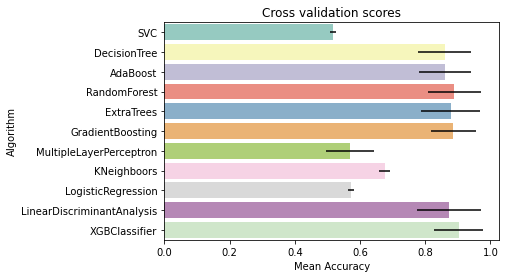

In [88]:
# Modeling step Test differents algorithms #inspired by Mohammed Innat on how he dealt with Titanic Competition
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(XGBClassifier())


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, x_resample, y = y_resample, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis","XGBClassifier"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [89]:
cv_res.sort_values('CrossValMeans',ascending=False)

,CrossValMeans,CrossValerrors,Algorithm
10,0.903533,0.074893,XGBClassifier
3,0.889429,0.081942,RandomForest
5,0.886302,0.068282,GradientBoosting
4,0.878888,0.090234,ExtraTrees
9,0.873820,0.097349,LinearDiscriminantAnalysis
1,0.860122,0.081111,DecisionTree
2,0.859427,0.079802,AdaBoost
7,0.676253,0.016485,KNeighboors
8,0.572777,0.009614,LogisticRegression
6,0.570374,0.073523,MultipleLayerPerceptron


In [ ]:
cv_res.to_excel('benchmark.xlsx',index=False)

In [53]:
#based on this result we will pick 5 top score algorithm and do some hypter parameter tuning

[0.717521   0.74514915]


73.13

In [53]:
#Running hyperparameter on GradientBoostingClassifier


gradboost = GradientBoostingClassifier()
gb_param_grid = {
              'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01, 0.001],
              'max_depth': [4, 8,16],
              'min_samples_leaf': [100,150,250],
              'max_features': [0.3, 0.1]
              }

gradcv = GridSearchCV(gradboost, param_grid = gb_param_grid, cv=kfold, 
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gradcv.fit(x_resample,y_resample)
gbc_best = gsGBC.best_estimator_

# Best score
gradcv.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


0.9011584129742254

In [54]:
GBC_best

GradientBoostingClassifier(learning_rate=0.05, max_depth=16, max_features=0.3,
                           min_samples_leaf=150, n_estimators=300)

In [51]:
#running hyperparameter on randomforest classifier

rf = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsrf = GridSearchCV(rf, param_grid = rf_param_grid, cv=kfold,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsrf.fit(x_resample,y_resample)
rf_best = gsrf.best_estimator_

# Best score
gsrf.best_score_

Fitting 10 folds for each of 36 candidates, totalling 360 fits


0.8950477845351867

In [52]:
rf_best

RandomForestClassifier(min_samples_split=20, n_estimators=200)

In [57]:
#running hyperparameter on xgbclassifier

xgbc = XGBClassifier(eval_metric='error')
xgbc_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
gsxgbc = GridSearchCV(xgbc, param_grid = xgbc_param_grid, cv=kfold,
                     scoring="accuracy", n_jobs= -1, verbose = 1)
gsxgbc.fit(x_resample,y_resample)

xgbc_best = gsxgbc.best_estimator_
gsxgbc.best_score_

Fitting 10 folds for each of 405 candidates, totalling 4050 fits


c:\users\fakhri robi aulia\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9034173182739649

In [59]:
xgbc_best 

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='error',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [60]:
from sklearn.model_selection import learning_curve

In [61]:
#comparing learning curves from GradientBoostingClassifier,RandomForestClassifier,and XGBClassifier
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
        
    x1 = np.linspace(0, 10, 8, endpoint=True) produces
        8 evenly spaced points in the range 0 to 10
    """
    
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\users\\fakhri robi aulia\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

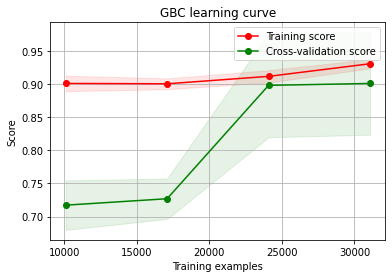

In [64]:
plot_learning_curve(estimator = gsGBC.best_estimator_,title = "GradientBoostingClassifier learning curve",
                    X = x_resample, y = y_resample, cv = kfold)

<module 'matplotlib.pyplot' from 'c:\\users\\fakhri robi aulia\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

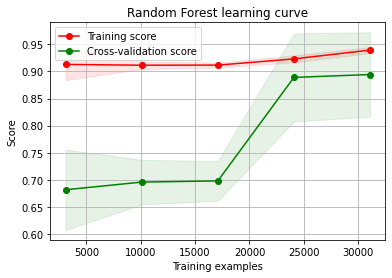

In [63]:
plot_learning_curve(estimator = gsRFC.best_estimator_,title = "Random Forest learning curve",
                    X = x_resample, y = y_resample, cv = kfold)

<module 'matplotlib.pyplot' from 'c:\\users\\fakhri robi aulia\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

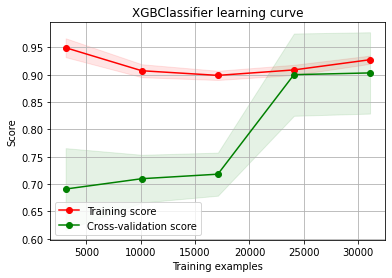

In [79]:
plot_learning_curve(estimator = gsxgbc.best_estimator_,title = "XGBClassifier learning curve",
                    X = x_resample, y = y_resample, cv = kfold)

In [66]:
#compiling three models using VotingClassifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('gradientboosting',gbc_best),('randomforest',rf_best),('xgboost',xgbc_best)],voting='soft',n_jobs=4)
voting_clf = voting_clf.fit(x_resample,y_resample)
y_pred = voting_clf.predict(x_val)
print(accuracy_score(y_pred,y_val))

In [76]:
score = cross_val_score(voting_clf, x_resample, y_resample, cv = kfold,
                       n_jobs = 4, scoring = 'accuracy')


NameError: name 'scores' is not defined

In [77]:
print(score)
print(round(np.mean(score)*100, 2))

[0.78656241 0.78163915 0.78916884 0.92673038 0.95742832 0.95887634
 0.95453229 0.95308427 0.95742832 0.95742832]
90.23


In [75]:
#checking Random Forest   Accuracy
clf = RandomForestClassifier(min_samples_split=20, n_estimators=200)
clf.fit(x_resample,y_resample)
y_pred = clf.predict(x_val)
print(accuracy_score(y_pred,y_val))

0.8593510082915344


In [85]:
#checking Gradient Boosting Accuracy
clf2 = GradientBoostingClassifier(learning_rate=0.01, max_depth=16, max_features=0.1,
                           min_samples_leaf=250, n_estimators=300)
clf2.fit(x_resample,y_resample)
y_pred2 = clf2.predict(x_val)
print(accuracy_score(y_pred2,y_val))

0.8458388780837343


In [74]:
#checking XGBClassifier Accuracy
clf3 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, eval_metric='error',
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=np.nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None)
clf3.fit(x_resample,y_resample)
y_pred3 = clf3.predict(x_val)
print(accuracy_score(y_pred3,y_val))

c:\users\fakhri robi aulia\appdata\local\programs\python\python37\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8656976149042891


In [78]:
#saving model as pkl file 
import joblib 
filename = 'final_model.pkl'
joblib.dump(voting_clf, filename)


['final_model.pkl']